# Telecom Churn Case Study

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

import missingno as misno

In [2]:
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
churn_data.shape

(99999, 226)

### Target Creation
* Since Data labels are unknowns we will use historical data to create label
* Data available for september will be used for label creation

In [4]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [5]:
#pd.set_option('max_colwidth', len(churn_data.columns))
#churn_data.head

In [6]:
#Getting all september columns
cols_sep = []
for column in churn_data.columns:
    if(column.endswith('_9')):
        cols_sep.append(column)
cols_sep

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [7]:
#Getting all august columns
cols_aug = []
for column in churn_data.columns:
    if(column.endswith('_8')):
        cols_aug.append(column)
len(cols_aug)

54

In [8]:
tagCols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

In [9]:
churn_data['total_usage_sep'] = churn_data[tagCols].sum(axis=1)

In [10]:
churn_data['total_usage_sep']

0            0.00
1          260.15
2          651.10
3          667.92
4          309.90
5          391.10
6         2638.40
7            0.00
8          177.09
9          563.96
10         328.28
11         146.04
12         157.22
13        1077.95
14         379.10
15        1130.22
16         590.30
17         718.21
18          40.99
19          75.69
20         534.76
21        1284.14
22           8.19
23         583.78
24         957.81
25         359.58
26        1539.04
27         230.53
28         145.73
29           0.00
30         941.04
31          98.32
32           0.00
33        5734.89
34          62.78
35           0.00
36         933.97
37         318.19
38         822.13
39         290.63
40         144.98
41         254.97
42         316.29
43         317.97
44        1011.12
45           0.00
46        1160.60
47         961.15
48        3213.82
49         433.13
50         297.52
51          25.25
52         168.70
53        1184.49
54        2043.81
55        

In [11]:
churn_data.loc[churn_data['total_usage_sep'] == 0, 'target'] = 1
churn_data.loc[churn_data['total_usage_sep'] > 0, 'target'] = 0

In [12]:
# Dropping mobile number column
churn_data.drop(['mobile_number'], axis=1, inplace=True)

# Dropping all september columns
churn_data.drop(cols_sep, axis='columns', inplace=True)

# Dropping 'sep_vbc_3g' column
churn_data.drop(['sep_vbc_3g'], axis='columns', inplace=True)

#Also drop 'total_usage_sep'
churn_data.drop('total_usage_sep', axis='columns', inplace=True)

In [13]:
churn_data.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0        109             0.0             0.0             0.0   
1        109             0.0             0.0             0.0   
2        109             0.0             0.0             0.0   
3        109             0.0             0.0             0.0   
4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014  197.385   
1            6/30/2014            7/31/2014            8/31/2014   34.047   
2            6/30/2014            7/31/2014            8/31/2014  167.690   
3            6/30/2014            7/31/2014            8/31/2014  221.338   
4            6/30/2014            7/31/2014            8/31/2014  261.636   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  214.816  213.803          NaN          NaN         0.00           NaN   
1  355.074  268.321        24.11        78.68         7.68         15.74   
2  189.058  210.226        11.54        55.24        37.26        143.33   
3  251.102  508.054        99.91        54.39       310.98        123.31   
4  309.876  238.174        50.31       149.44        83.89         76.96   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           NaN          0.00            NaN            NaN           0.00   
1         99.84        304.76            0.0           0.00           0.00   
2        220.59        208.36            0.0           0.00           0.00   
3        109.01         71.68            0.0          54.86          44.38   
4         91.88        124.26            0.0           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            NaN            NaN           0.00               NaN   
1            0.0           0.00           0.00             23.88   
2            0.0           0.00           0.00              7.19   
3            0.0          28.09          39.04             73.68   
4            0.0           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               NaN              0.00               NaN               NaN   
1             74.56              7.68             11.51             75.94   
2             28.74             13.58             29.34             16.86   
3             34.81             10.61            107.43             83.21   
4            149.44             83.89             67.64             91.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00               NaN               NaN              0.00   
1            291.86              0.00              0.00              0.00   
2             38.46             24.11             21.79             15.61   
3             22.46              1.91              0.65              4.91   
4            124.26              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               NaN               NaN              0.00           NaN   
1               0.0              2.91              0.00         35.39   
2               0.0            135.54             45.76         60.66   
3               0.0              0.00              0.00        183.03   
4               0.0              0.00              0.00        117.96   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           NaN          0.00               NaN               NaN   
1        150.51        299.54              0.23              4.11   
2         67.41         67.66              4.34             26.49   
3        118.68         37.99             26.23             14.89   
4        241.33        208.16              0.00              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  s

In [14]:
churn_data['target'] = churn_data['target'].astype('category')

In [15]:
churn_data.info('object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 171 columns):
 #    Column                    Dtype   
---   ------                    -----   
 0    circle_id                 int64   
 1    loc_og_t2o_mou            float64 
 2    std_og_t2o_mou            float64 
 3    loc_ic_t2o_mou            float64 
 4    last_date_of_month_6      object  
 5    last_date_of_month_7      object  
 6    last_date_of_month_8      object  
 7    arpu_6                    float64 
 8    arpu_7                    float64 
 9    arpu_8                    float64 
 10   onnet_mou_6               float64 
 11   onnet_mou_7               float64 
 12   onnet_mou_8               float64 
 13   offnet_mou_6              float64 
 14   offnet_mou_7              float64 
 15   offnet_mou_8              float64 
 16   roam_ic_mou_6             float64 
 17   roam_ic_mou_7             float64 
 18   roam_ic_mou_8             float64 
 19   roam_og_mou_6          

0.0    89.808898
1.0    10.191102
Name: target, dtype: float64


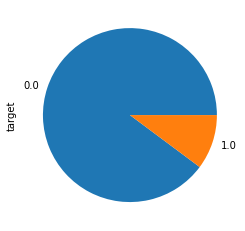

In [16]:
print((churn_data['target'].value_counts()/len(churn_data))*100)
((churn_data['target'].value_counts()/len(churn_data))*100).plot(kind="pie")
plt.show()

#### 89.8 % of the customers do not churn and only 10.2% of the customers are churned, Hence there seems to be a class imbalance

### Missing value treatment

In [17]:
# Function to retun the columns with more than missingCutoff% missing values.

def getMissingValues(missingCutoff):
    missing = round(100*(churn_data.isnull().sum()/churn_data.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

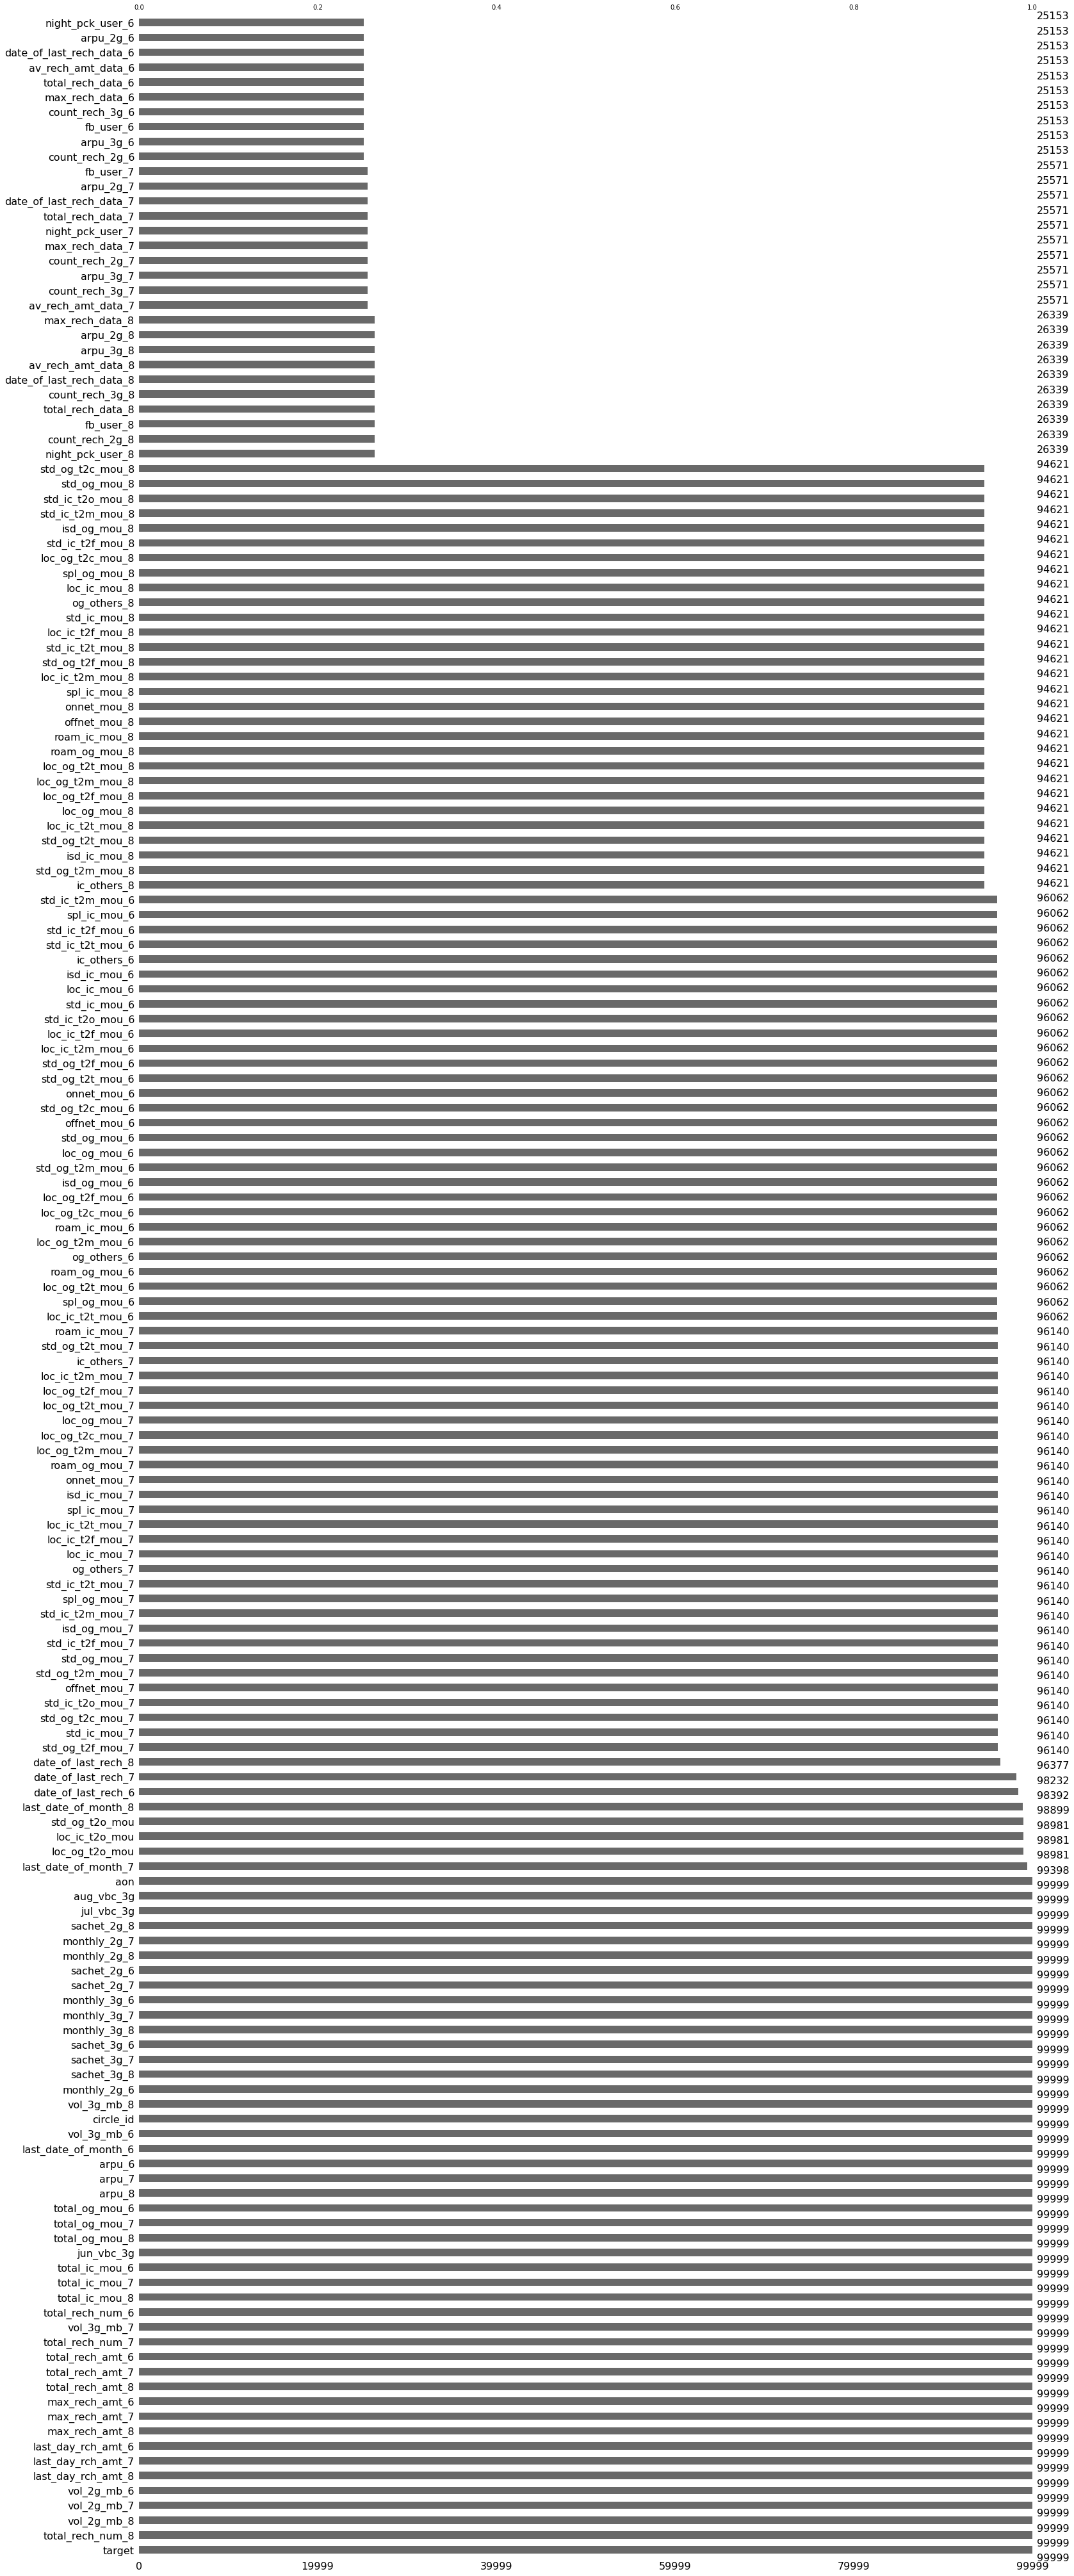

In [18]:
misno.bar(churn_data, sort='descending')
plt.show()

In [19]:
all_columns=churn_data.columns
date_columns=[x for x in all_columns if 'date' in x]
numeric_columns=[x for x in all_columns if x not in date_columns]

In [20]:
# percent of null values in date columns

churn_data[date_columns].isnull().sum()/len(churn_data)*100

last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
date_of_last_rech_6          1.607016
date_of_last_rech_7          1.767018
date_of_last_rech_8          3.622036
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
dtype: float64

In [21]:
from datetime import date,datetime
# Imputing default value for the following columns

churn_data['last_date_of_month_7']=churn_data['last_date_of_month_7'].fillna('7/31/2014')
churn_data['last_date_of_month_8']=churn_data['last_date_of_month_8'].fillna('8/31/2014')
churn_data['last_date_of_month_7'] = pd.to_datetime(churn_data['last_date_of_month_7'])
churn_data['last_date_of_month_8'] = pd.to_datetime(churn_data['last_date_of_month_8'])

In [22]:
# Imputing 0 in following columns as null values here means no reacherge was done.

churn_data['date_of_last_rech_6']=churn_data['date_of_last_rech_6'].fillna('6/1/2014')
churn_data['date_of_last_rech_7'].fillna(0, inplace=True)
churn_data['date_of_last_rech_8'].fillna(0, inplace=True)
churn_data['date_of_last_rech_data_6'].fillna(0, inplace=True)
churn_data['date_of_last_rech_data_7'].fillna(0, inplace=True)
churn_data['date_of_last_rech_data_8'].fillna(0, inplace=True)

In [23]:
churn_data[date_columns].isnull().sum()/len(churn_data)*100

last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
date_of_last_rech_6         0.0
date_of_last_rech_7         0.0
date_of_last_rech_8         0.0
date_of_last_rech_data_6    0.0
date_of_last_rech_data_7    0.0
date_of_last_rech_data_8    0.0
dtype: float64

In [24]:
# Droping columns which have single value.

unique_1_col=[]
for i in numeric_columns:
    if churn_data[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass

churn_data.drop(unique_1_col, axis=1, inplace = True)
print("\n The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model\n",
      unique_1_col)


 The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [25]:
# Missing values per column expressed as % of total number of values
getMissingValues(0)

There are 108 features having more than 0% missing values/entries


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       4.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       4.0
std_og_t2f_mou_8       5.0
std_og_mou_6           4.0
s

Out the these 108 features, many are required and are essential for analysis. The missing values for these features seems to suggest that these customers did not have added any value at that month. We can choose to impute these values with 0 as we can't take mean or median here, to make enable these features to give value to analysis.

In [26]:
missingcol = list(getMissingValues(0).index)
churn_data[missingcol]=churn_data[missingcol].fillna(0)

There are 108 features having more than 0% missing values/entries


In [27]:
getMissingValues(0)

There are 0 features having more than 0% missing values/entries


Series([], dtype: float64)

In [28]:
churn_data.shape

(99999, 161)

In [29]:
churn_data.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014           2014-07-31           2014-08-31  197.385   
1            6/30/2014           2014-07-31           2014-08-31   34.047   
2            6/30/2014           2014-07-31           2014-08-31  167.690   
3            6/30/2014           2014-07-31           2014-08-31  221.338   
4            6/30/2014           2014-07-31           2014-08-31  261.636   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  214.816  213.803         0.00         0.00         0.00          0.00   
1  355.074  268.321        24.11        78.68         7.68         15.74   
2  189.058  210.226        11.54        55.24        37.26        143.33   
3  251.102  508.054        99.91        54.39       310.98        123.31   
4  309.876  238.174        50.31       149.44        83.89         76.96   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            0.0           0.00           0.00   
1         99.84        304.76            0.0           0.00           0.00   
2        220.59        208.36            0.0           0.00           0.00   
3        109.01         71.68            0.0          54.86          44.38   
4         91.88        124.26            0.0           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.0           0.00           0.00              0.00   
1            0.0           0.00           0.00             23.88   
2            0.0           0.00           0.00              7.19   
3            0.0          28.09          39.04             73.68   
4            0.0           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             74.56              7.68             11.51             75.94   
2             28.74             13.58             29.34             16.86   
3             34.81             10.61            107.43             83.21   
4            149.44             83.89             67.64             91.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            291.86              0.00              0.00              0.00   
2             38.46             24.11             21.79             15.61   
3             22.46              1.91              0.65              4.91   
4            124.26              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.00          0.00   
1               0.0              2.91              0.00         35.39   
2               0.0            135.54             45.76         60.66   
3               0.0              0.00              0.00        183.03   
4               0.0              0.00              0.00        117.96   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0          0.00          0.00              0.00              0.00   
1        150.51        299.54              0.23              4.11   
2         67.41         67.66              4.34             26.49   
3        118.68         37.99             26.23             14.89   
4        241.33        208.16              0.00              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.46              0.13   
2             22.58             41.81             67.41             75.53   
3            289.58              2.99              1.73              6.53   
4              0.00              9.31  

### High value customer

In [30]:
# let's add new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process
churn_data['total_data_rech_amt_6'] = churn_data['total_rech_data_6'] * churn_data['av_rech_amt_data_6']
churn_data['total_data_rech_amt_7'] = churn_data['total_rech_data_7'] * churn_data['av_rech_amt_data_7']
churn_data['total_data_rech_amt_8'] = churn_data['total_rech_data_8'] * churn_data['av_rech_amt_data_8']

In [31]:
churn_data.shape

(99999, 164)

We need to predict churn only for the high-value customers.
High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount of the 3 months.

In [32]:
# Computing the average recharge amount for the month 6 & 7 & 8. 
# This total amount is equal to the sum of talk time recharge 
# and data recharge amounts for the respective months.

avg_recharge_amount = churn_data[['total_data_rech_amt_6','total_data_rech_amt_7',
                                  'total_data_rech_amt_8','total_rech_amt_6','total_rech_amt_7',
                                  'total_rech_amt_8']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount, 70)

print("70th percentile of the average recharge amount in the 3 months is - ", amount_70th_percentile)

70th percentile of the average recharge amount in the 3 months is -  241.83333333333334


In [33]:
# Filtering the high values

churn_data_HV = churn_data[avg_recharge_amount >= amount_70th_percentile]

In [34]:
churn_data_HV.shape

(30009, 164)

In [35]:
# Reset the dataframe indexes

churn_data_HV = churn_data_HV.reset_index(drop=True)
churn_data_HV.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0            6/30/2014           2014-07-31           2014-08-31   197.385   
1            6/30/2014           2014-07-31           2014-08-31  1069.180   
2            6/30/2014           2014-07-31           2014-08-31   378.721   
3            6/30/2014           2014-07-31           2014-08-31   492.846   
4            6/30/2014           2014-07-31           2014-08-31   163.430   

     arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   214.816   213.803         0.00         0.00         0.00          0.00   
1  1349.850  3171.480        57.84        54.68        52.29        453.43   
2   492.223   137.362       413.69       351.03        35.08         94.66   
3   205.671   593.260       501.76       108.39       534.24        413.31   
4   241.218   326.920         4.04         7.38        13.61          0.51   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        567.16        325.91          16.23          33.49          31.64   
2         80.63        136.48           0.00           0.00           0.00   
3        119.28        482.46          23.53         144.24          72.11   
4         41.28          9.46           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              0.00   
1          23.74          12.59          38.06             51.39   
2           0.00           0.00           0.00            297.13   
3           7.98          35.26           1.44             49.63   
4           0.00           0.00           0.00              4.04   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             31.38             40.28            308.63            447.38   
2            217.59             12.49             80.96             70.58   
3              6.19             36.01            151.13             47.28   
4              6.89             13.61              0.51              1.49   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            294.46              4.54              0.00             23.51   
4              9.46              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.00          0.00   
1               0.0              0.00              0.00        422.16   
2               0.0              0.00              7.15        378.09   
3               0.0              0.00              0.49        205.31   
4               0.0              0.95              0.00          4.56   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0          0.00          0.00              0.00              0.00   
1        533.91        255.79              4.30             23.29   
2        288.18         63.04            116.56            133.43   
3         53.48        353.99            446.41             85.98   
4          8.39         23.08              0.00              0.48   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
1             12.01             49.89             31.76             49.14   
2             22.58             13.69             10.04             75.69   
3            498.23            255.36             52.94            156.94   
4              0.00  

In [36]:
churn_data_HV.shape

(30009, 164)

### Handling Date columns

Conversion of date columns into integer values for model to interpret better

In [37]:
# Dropping last date of the month columns since it seems like they won't be contributing to the further analysis
churn_data_HV.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], axis=1, inplace=True)

In [38]:
churn_data_HV.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803         0.00         0.00         0.00   
1  1069.180  1349.850  3171.480        57.84        54.68        52.29   
2   378.721   492.223   137.362       413.69       351.03        35.08   
3   492.846   205.671   593.260       501.76       108.39       534.24   
4   163.430   241.218   326.920         4.04         7.38        13.61   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00           0.00           0.00   
1        453.43        567.16        325.91          16.23          33.49   
2         94.66         80.63        136.48           0.00           0.00   
3        413.31        119.28        482.46          23.53         144.24   
4          0.51         41.28          9.46           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00   
3          72.11           7.98          35.26           1.44   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3             49.63              6.19             36.01            151.13   
4              4.04              6.89             13.61              0.51   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             47.28            294.46              4.54              0.00   
4              1.49              9.46              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.00   
1             53.23               0.0              0.00              0.00   
2              0.00               0.0              0.00              7.15   
3             23.51               0.0              0.00              0.49   
4              0.00               0.0              0.95              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3        205.31         53.48        353.99            446.41   
4          4.56          8.39         23.08              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3             85.98            498.23            255.36             52.94   
4              0.48              0.00              0.00             38.83   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            156.94              0.00              0.00              0.00   
4              0.00              0.00              0.00              0.00   



In [39]:
# Converting data type of data columns from object to datetime
cols = list(churn_data_HV.select_dtypes(include='object').columns)
churn_data_HV[cols] = churn_data_HV[cols].apply(pd.to_datetime)

In [40]:
# getting date of last recharge done  by customer in 3 months of time
churn_data_HV['date_last_rech'] = churn_data_HV['date_of_last_rech_8']

churn_data_HV.loc[churn_data_HV['date_last_rech'] == 
                  '1970-01-01T00:00:00.000000000', 'date_last_rech'] = churn_data_HV['date_of_last_rech_7']

churn_data_HV.loc[churn_data_HV['date_last_rech'] == 
                  '1970-01-01T00:00:00.000000000', 'date_last_rech'] = churn_data_HV['date_of_last_rech_6']

In [41]:
# Calculating number of days since last recharge
import datetime
churn_data_HV['days_since_last_rech'] = (pd.to_datetime(datetime.date(2014, 9, 1)) - 
                                         pd.to_datetime(churn_data_HV['date_last_rech'])).dt.days

In [42]:
# # getting date of last data recharge done  by customer in 3 months of time
churn_data_HV['date_last_rech_data'] = churn_data_HV['date_of_last_rech_data_8']

churn_data_HV.loc[churn_data_HV['date_last_rech_data'] == 
                  '1970-01-01T00:00:00.000000000', 'date_last_rech_data'] = churn_data_HV['date_of_last_rech_data_7']

churn_data_HV.loc[churn_data_HV['date_last_rech_data'] == 
                  '1970-01-01T00:00:00.000000000', 'date_last_rech_data'] = churn_data_HV['date_of_last_rech_data_6']

In [43]:
# Calculating number of days since last data recharge
churn_data_HV['days_since_last_rech_data'] = (pd.to_datetime(datetime.date(2014, 9, 1)) - 
                                         pd.to_datetime(churn_data_HV['date_last_rech_data'])).dt.days

In [44]:
# Dropping all date columns
cols = list(churn_data_HV.select_dtypes(include='datetime64[ns]').columns)
churn_data_HV.drop(cols, axis=1, inplace=True)

In [45]:
churn_data_HV.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803         0.00         0.00         0.00   
1  1069.180  1349.850  3171.480        57.84        54.68        52.29   
2   378.721   492.223   137.362       413.69       351.03        35.08   
3   492.846   205.671   593.260       501.76       108.39       534.24   
4   163.430   241.218   326.920         4.04         7.38        13.61   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00           0.00           0.00   
1        453.43        567.16        325.91          16.23          33.49   
2         94.66         80.63        136.48           0.00           0.00   
3        413.31        119.28        482.46          23.53         144.24   
4          0.51         41.28          9.46           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00   
3          72.11           7.98          35.26           1.44   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3             49.63              6.19             36.01            151.13   
4              4.04              6.89             13.61              0.51   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             47.28            294.46              4.54              0.00   
4              1.49              9.46              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.00   
1             53.23               0.0              0.00              0.00   
2              0.00               0.0              0.00              7.15   
3             23.51               0.0              0.00              0.49   
4              0.00               0.0              0.95              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3        205.31         53.48        353.99            446.41   
4          4.56          8.39         23.08              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3             85.98            498.23            255.36             52.94   
4              0.48              0.00              0.00             38.83   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            156.94              0.00              0.00              0.00   
4              0.00              0.00              0.00              0.00   



* As we can see in days_since_last_rech_data there are some outliers like 16314, So to avoid such data in the dataframe, We will check the earliest recgarge done between the normal recharge and the data recharge and update the column with smallest value among the two columns(`days_since_last_rech` and `days_since_last_rech_data`)

In [46]:
churn_data_HV['days_since_last_rech'] = np.round(np.minimum(churn_data_HV['days_since_last_rech'], 
                                                            churn_data_HV['days_since_last_rech_data']),2) 

In [47]:
# Dropping days_since_last_rech_data as it also captured in days_since_last_rech
churn_data_HV.drop(['days_since_last_rech_data'], axis=1, inplace=True)

In [48]:
# Check if values are well within the range
churn_data_HV['days_since_last_rech'].unique()

array([24,  6,  2,  1,  8,  4,  9, 30,  5, 11,  3,  7, 15, 10, 13, 56, 33,
       23, 31, 42, 48, 39, 12, 17, 22, 16, 20, 25, 21, 19, 14, 18, 36, 27,
       38, 29, 35, 53, 57, 79, 32, 77, 40, 47, 72, 46, 26, 45, 41, 54, 34,
       28, 63, 69, 37, 55, 51, 67, 49, 61, 50, 66, 43, 73, 70, 64, 52, 44,
       59, 62, 74, 81, 86, 65, 68, 78])

* `days_since_last_rech` is overall count of days since the last recharge of any type was done
* `days_since_last_rech` is the column comprising with the information of all recharge date columns of 6,7,8 months

### EDA

In [49]:
churn_data_HV.describe(percentiles=[0.05,0.25,0.50,0.75,0.95,0.99])

arpu_6        arpu_7        arpu_8  onnet_mou_6   onnet_mou_7  \
count  30009.000000  30009.000000  30009.000000  30009.00000  30009.000000   
mean     538.330826    556.796917    550.166757    247.50596    265.877016   
std      467.622300    481.511889    496.895071    451.93395    480.222475   
min    -2258.709000  -2014.045000   -945.808000      0.00000      0.000000   
5%        74.182800    108.318600     72.375000      0.00000      0.000000   
25%      280.559000    301.702000    286.411000     14.34000     15.230000   
50%      459.883000    478.233000    470.957000     77.08000     81.110000   
75%      684.873000    697.481000    693.361000    269.66000    287.530000   
95%     1239.360000   1260.719000   1283.342200   1104.97000   1181.300000   
99%     1984.958600   1999.399600   2013.479400   2131.80600   2209.147600   
max    27731.088000  35145.834000  33543.624000   7376.71000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30009.000000  30009.000000  30009.000000  30009.000000   30009.000000   
mean     252.792724    356.325327    375.210830    360.269890      15.646948   
std      474.351730    477.125004    498.979985    496.557101      74.787761   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
5%         0.000000      0.000000      0.000000      0.000000       0.000000   
25%       13.530000     62.130000     67.640000     59.280000       0.000000   
50%       74.730000    205.190000    215.830000    207.090000       0.000000   
75%      268.260000    461.590000    488.680000    473.040000       0.000000   
95%     1130.810000   1222.124000   1272.028000   1228.658000      79.742000   
99%     2222.771600   2324.975600   2402.454800   2265.671600     329.602000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30009.000000   30009.000000   30009.000000   30009.000000   
mean       12.112338      12.807376      25.821417      19.485599   
std        74.531951      74.501018     114.348874      95.668616   
min         0.000000       0.000000       0.000000       0.000000   
5%          0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
95%        53.010000      58.136000     139.850000     100.378000   
99%       269.250000     289.998000     519.130400     433.317600   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30009.000000      30009.000000      30009.000000      30009.000000   
mean       20.743864         82.290449         85.338853         81.858774   
std       107.741317        225.834762        241.227622        233.101644   
min         0.000000          0.000000          0.000000          0.000000   
5%          0.000000          0.000000          0.000000          0.000000   
25%         0.000000          3.710000          4.590000          3.810000   
50%         0.000000         22.990000         24.580000         23.540000   
75%         0.000000         75.330000         78.230000         76.430000   
95%       106.798000        317.684000        322.948000        311.758000   
99%       451.814400        982.842400       1011.578400        947.609600   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      30009.000000      30009.000000      30009.000000      30009.000000   
mean         158.792488        161.886761        158.905186          6.267486   
std          247.178257        240.780647        237.173567         22.004244   
min            0.000000  

* Looking at the data description, all the data columns except mobile_number, seems like there are outliers present

In [50]:
def distplotGrouped(col1, col2, col3):
    plt.figure(figsize=(24, 16))
    j = 6
    for i in range(3):
        plt.subplot(3,3,1+3*i)
        sns.distplot(churn_data_HV[col1+str(j)])
        plt.subplot(3,3,2+3*i)
        sns.distplot(churn_data_HV[col2+str(j)])
        if(len(col3) != 0):
            plt.subplot(3,3,3+3*i)
            sns.distplot(churn_data_HV[col3+str(j)])
        j += 1
    

In [51]:
def boxplotGrouped(col1, col2):
    plt.figure(figsize=(24, 16))
    j = 6
    for i in range(3):
        plt.subplot(3,3,1+3*i)
        sns.boxplot(churn_data_HV[col1+str(j)], churn_data_HV['target'])
        plt.subplot(3,3,2+3*i)
        sns.boxplot(churn_data_HV[col2+str(j)], churn_data_HV['target'])
        j += 1

#### Univariate Analysis

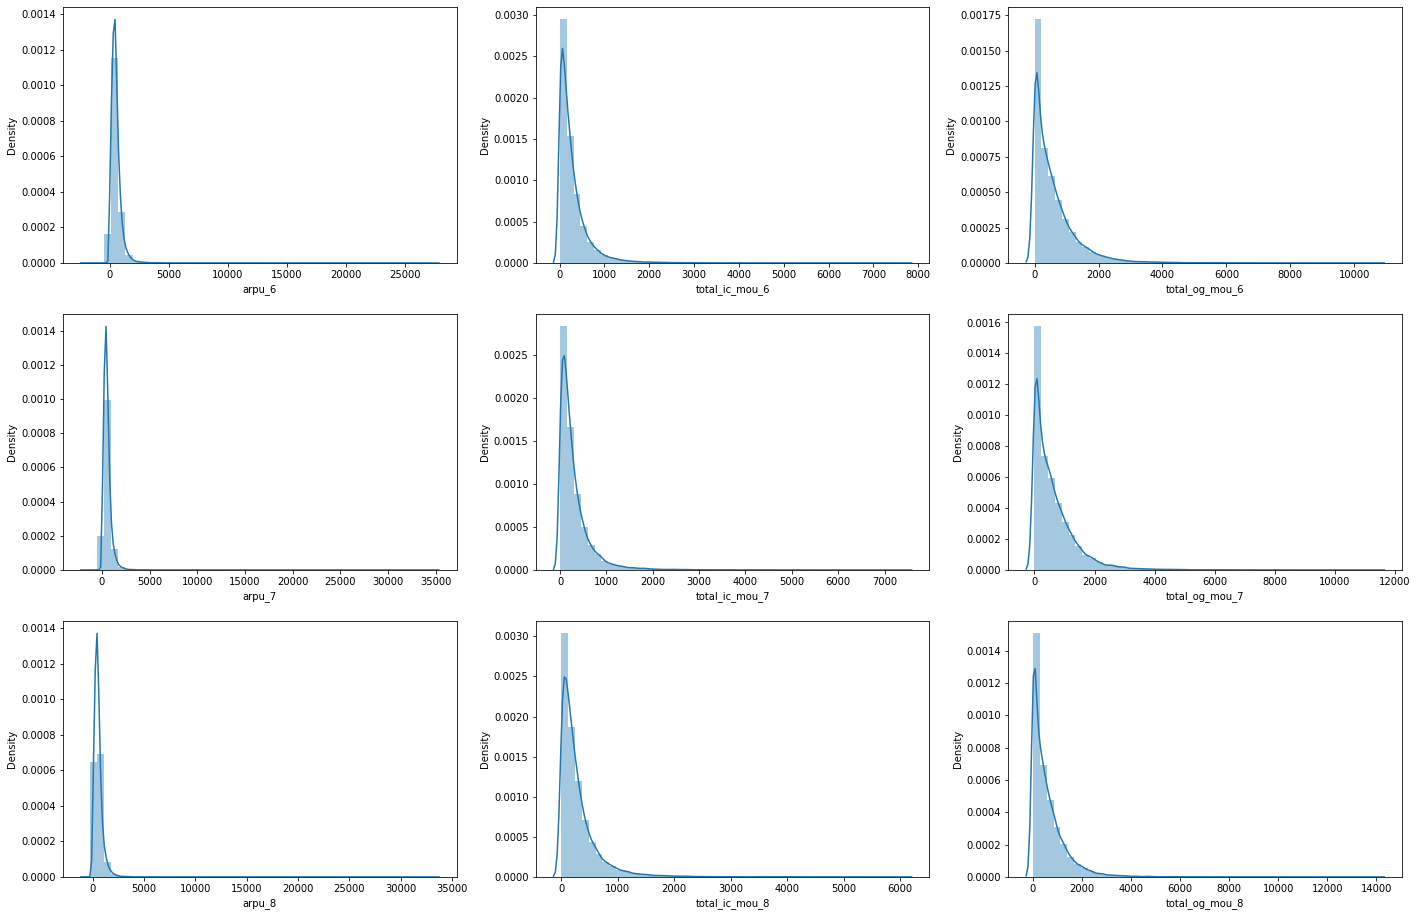

In [52]:
# Distribution of columns arpu_, total_ic_mou_ and total_og_mou_
distplotGrouped("arpu_", "total_ic_mou_", "total_og_mou_")

* Density of arpu is decreasing over the months
* Distribution of total_ic_mou over the months is similar

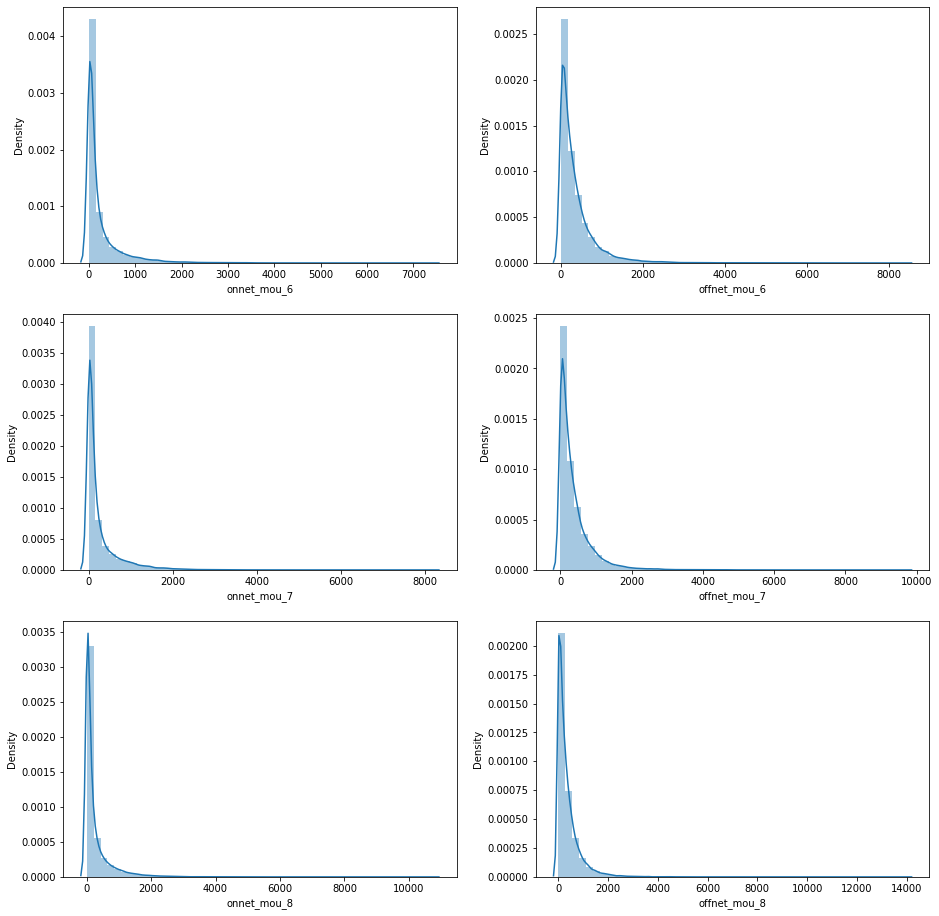

In [53]:
# Distribution of columns onnet_mou_, offnet_mou_
distplotGrouped('onnet_mou_', 'offnet_mou_', '')

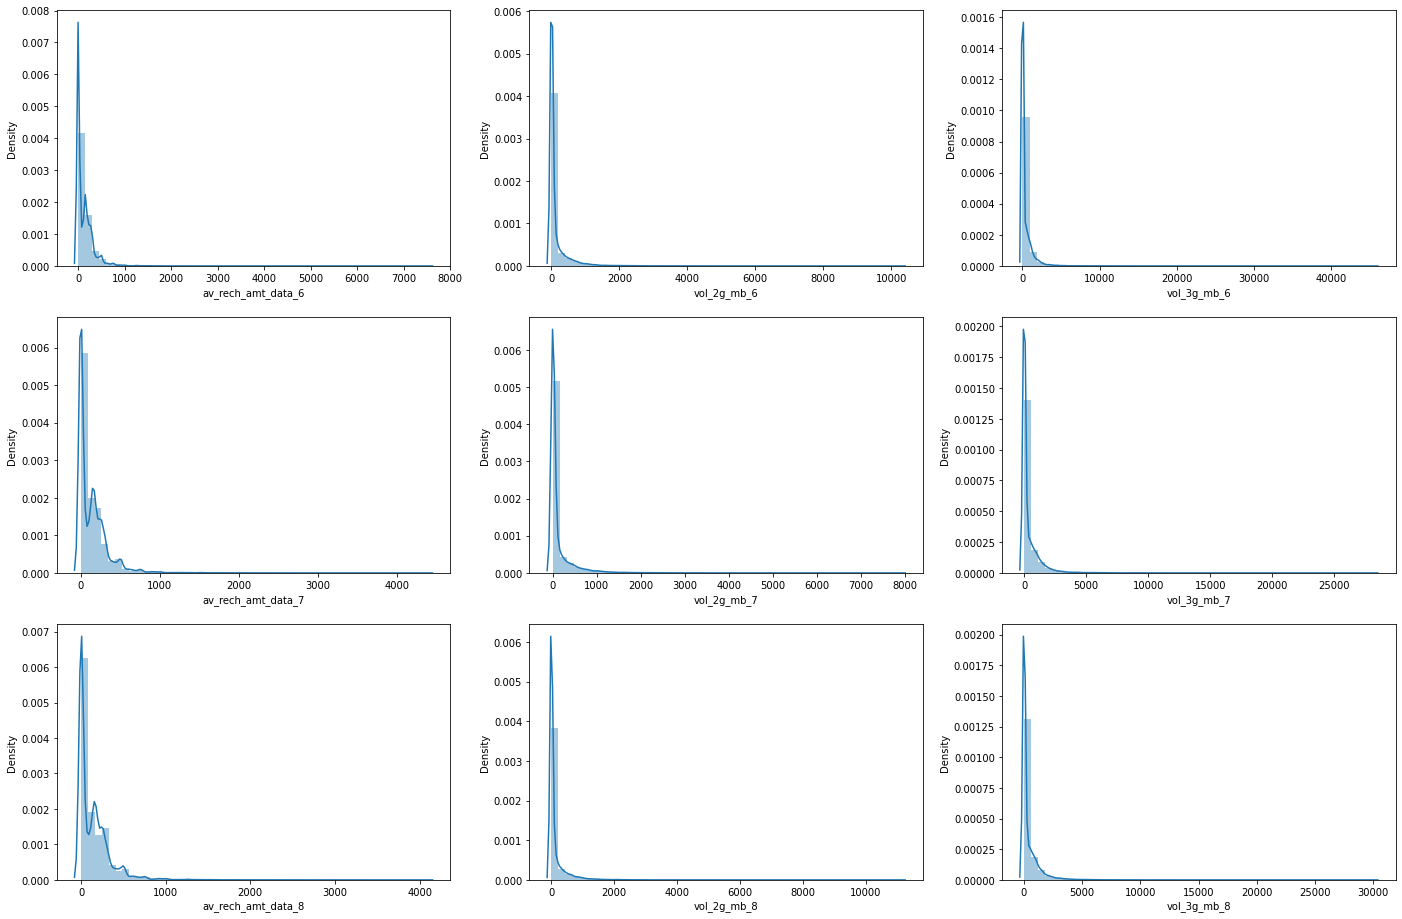

In [54]:
# Distribution plots for columns 'av_rech_amt_data_', 'vol_2g_mb_', 'vol_3g_mb_'
distplotGrouped('av_rech_amt_data_', 'vol_2g_mb_', 'vol_3g_mb_')

#### Bivariate Analysis 

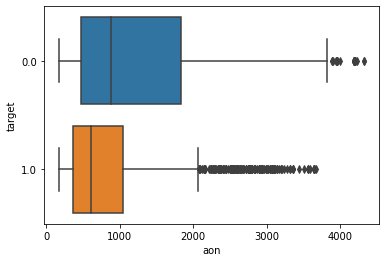

In [55]:
# Box plot to visualise aon with target
sns.boxplot(churn_data_HV['aon'], churn_data_HV['target'])
plt.show()

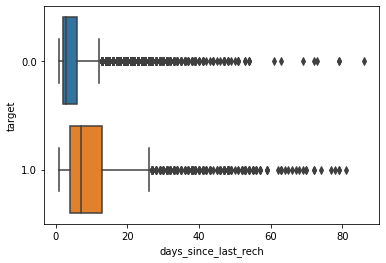

In [56]:
# Box plot to visualise days_since_last_rech with target
sns.boxplot(churn_data_HV['days_since_last_rech'], churn_data_HV['target'])
plt.show()

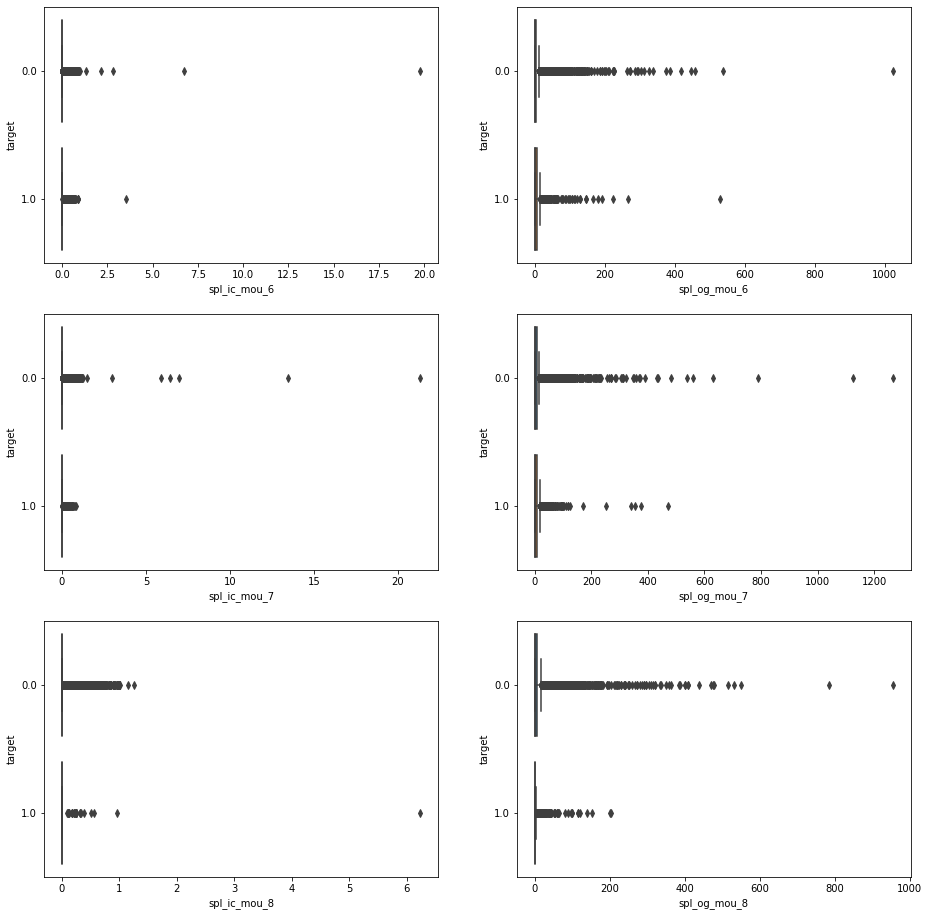

In [57]:
# Box plot to visualise spl_ic_mou_, spl_og_mou_ with target
boxplotGrouped('spl_ic_mou_', 'spl_og_mou_')

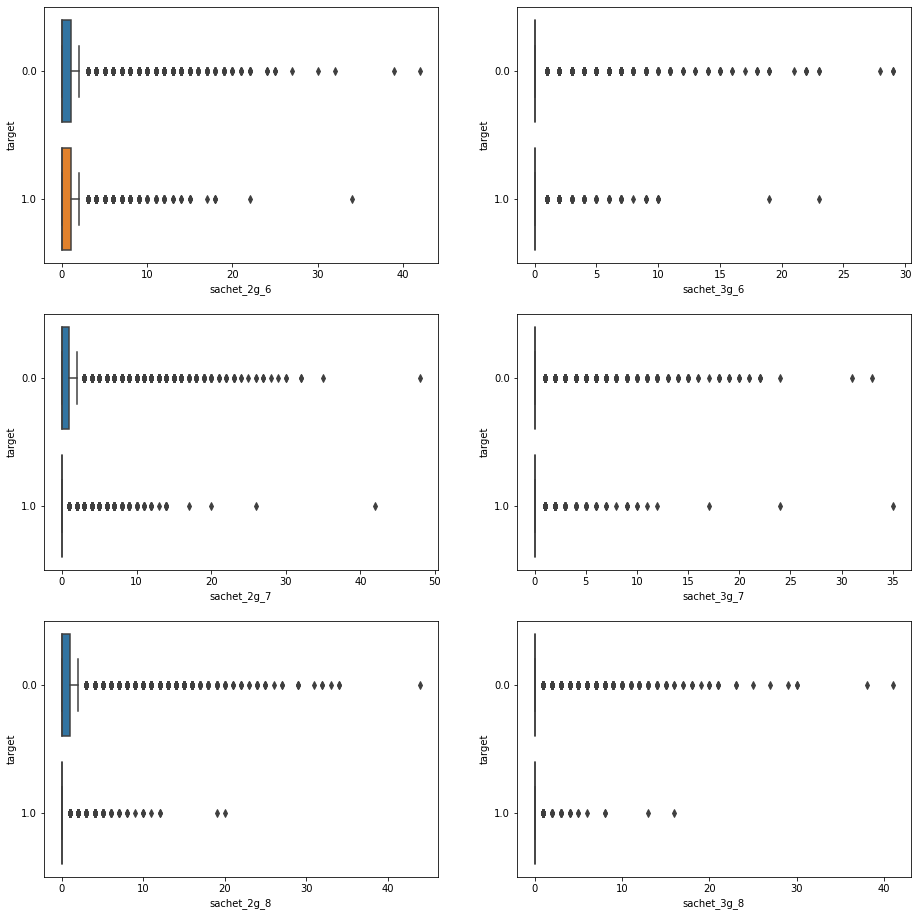

In [58]:
# Box plot to visualise sachet_2g_, sachet_3g_ with target
boxplotGrouped('sachet_2g_', 'sachet_3g_')

* From all the Box plots and churn data description we can see that there are large number of outliers present in the data

#### Outlier Treatement

In [59]:
# Capping outliers withing 0.05 and 0.95 values

def cap_data(df):
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.05,0.95]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

churn_data_HV_capped = cap_data(churn_data_HV)
churn_data_HV_capped.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30009.000000  30009.000000  30009.000000  30009.000000  30009.000000   
mean     513.390322    532.381956    524.366600    214.114489    231.575345   
std      310.926793    306.394116    319.108968    305.095658    329.455247   
min       74.182800    108.318600     72.375000      0.000000      0.000000   
25%      280.559000    301.702000    286.411000     14.340000     15.230000   
50%      459.883000    478.233000    470.957000     77.080000     81.110000   
75%      684.873000    697.481000    693.361000    269.660000    287.530000   
max     1239.360000   1260.719000   1283.342200   1104.970000   1181.300000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30009.000000  30009.000000  30009.000000  30009.000000   30009.000000   
mean     216.965782    322.134215    340.092639    325.240299       7.385091   
std      312.791095    339.037092    355.138022    343.554846      20.105373   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       13.530000     62.130000     67.640000     59.280000       0.000000   
50%       74.730000    205.190000    215.830000    207.090000       0.000000   
75%      268.260000    461.590000    488.680000    473.040000       0.000000   
max     1130.810000   1222.124000   1272.028000   1228.658000      79.742000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30009.000000   30009.000000   30009.000000   30009.000000   
mean        4.371104       4.925930      13.167271       8.423575   
std        13.053829      14.358321      35.440660      24.818262   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        53.010000      58.136000     139.850000     100.378000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30009.000000      30009.000000      30009.000000      30009.000000   
mean        9.135436         59.738859         61.606461         59.756021   
std        26.576594         85.011373         86.269270         83.848889   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          3.710000          4.590000          3.810000   
50%         0.000000         22.990000         24.580000         23.540000   
75%         0.000000         75.330000         78.230000         76.430000   
max       106.798000        317.684000        322.948000        311.758000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      30009.000000      30009.000000      30009.000000      30009.000000   
mean         140.433902        144.834562        141.949544          4.276052   
std          165.591161        167.401640        165.502101          8.106457   
min            0.000000          0.000000          0.000000          0.000000   
25%           16.890000         20.280000         17.710000          0.000000   
50%           73.790000         78.210000         75.310000          0.000000   
75%          203.540000        206.580000        207.590000          4.140000   
max          588.600000        596.246000        585.330000         30.228000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      30009.000000      30009.000000      30009.000000      30009.000000   
mean           4.449609          4.230201          0.947325          1.161397   
std            8.336908          7.924299          2.295317          2.722580   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.130000          0.0000

In [60]:
new_churn_data_HV = churn_data_HV.copy()

### Modelling

In [61]:
import sklearn

In [62]:
sklearn.__version__

'1.0.2'

In [63]:
#pip install smote-variants

In [64]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### Scaling Features

In [65]:
y = churn_data_HV.pop('target')
X = churn_data_HV

In [66]:
churn_data_HV.head()

arpu_6    arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.8030         0.00         0.00         0.00   
1  1069.180  1260.719  1283.3422        57.84        54.68        52.29   
2   378.721   492.223   137.3620       413.69       351.03        35.08   
3   492.846   205.671   593.2600       501.76       108.39       534.24   
4   163.430   241.218   326.9200         4.04         7.38        13.61   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00           0.00           0.00   
1        453.43        567.16        325.91          16.23          33.49   
2         94.66         80.63        136.48           0.00           0.00   
3        413.31        119.28        482.46          23.53          53.01   
4          0.51         41.28          9.46           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          0.000           0.00           0.00           0.00   
1         31.640          23.74          12.59          38.06   
2          0.000           0.00           0.00           0.00   
3         58.136           7.98          35.26           1.44   
4          0.000           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3             49.63              6.19             36.01            151.13   
4              4.04              6.89             13.61              0.51   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00             0.000             0.000   
1            447.38            162.28            30.228            31.122   
2             70.58             50.54             0.000             0.000   
3             47.28            294.46             4.540             0.000   
4              1.49              9.46             0.000             0.000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0             0.000               0.0              0.00              0.00   
1            29.452               0.0              0.00              0.00   
2             0.000               0.0              0.00              7.15   
3            23.510               0.0              0.00              0.49   
4             0.000               0.0              0.95              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3        205.31         53.48        353.99            446.41   
4          4.56          8.39         23.08              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3             85.98            498.23            255.36             52.94   
4              0.48              0.00              0.00             38.83   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00             0.000              0.00             0.000   
1             49.14             6.586              6.46             6.296   
2             75.69             0.000              0.00             0.000   
3            156.94             0.000              0.00             0.000   
4              0.00             0.000              0.00             0.00

In [67]:
# Standard scaling features
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -1.016350 -1.036480 -0.973237    -0.701806    -0.702916    -0.693656   
1  1.787556  2.377164  2.378461    -0.512223    -0.536942    -0.526481   
2 -0.433129 -0.131072 -1.212786     0.654152     0.362588    -0.581503   
3 -0.066076 -1.066327  0.215897     0.942820    -0.373912     1.014350   
4 -1.125558 -0.950308 -0.618754    -0.688564    -0.680515    -0.650144   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.950160     -0.957651     -0.946707      -0.367325      -0.334858   
1      0.387267      0.639388      0.001949       0.439935       2.230716   
2     -0.670953     -0.730609     -0.549442      -0.367325      -0.334858   
3      0.268930     -0.621776      0.457634       0.803028       3.726087   
4     -0.948656     -0.841413     -0.919171      -0.367325      -0.334858   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.343077      -0.371536      -0.339416      -0.343746   
1       1.860560       0.298327       0.167880       1.088365   
2      -0.343077      -0.371536      -0.339416      -0.343746   
3       3.705932      -0.146367       1.081336      -0.289562   
4      -0.343077      -0.371536      -0.339416      -0.343746   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.702728         -0.714130         -0.712675         -0.848090   
1         -0.098210         -0.350379         -0.232279          1.015748   
2          2.792510          1.808131         -0.563714         -0.359167   
3         -0.118914         -0.642377         -0.283205          0.064594   
4         -0.655204         -0.634263         -0.550357         -0.845010   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.865206         -0.857705         -0.527496         -0.533733   
1          1.807333          0.122843          3.201445          3.199368   
2         -0.443579         -0.552326         -0.527496         -0.533733   
3         -0.582767          0.921517          0.032561         -0.533733   
4         -0.856306         -0.800544         -0.527496         -0.533733   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.533835         -0.412728         -0.426587         -0.431862   
1          3.182896         -0.412728         -0.426587         -0.431862   
2         -0.533835         -0.412728         -0.426587          2.162424   
3          2.433038         -0.412728         -0.426587         -0.254072   
4         -0.533835         -0.412728         -0.077647         -0.431862   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0     -0.868191     -0.891248     -0.882197         -0.497205   
1      0.800387      1.212792      0.141800         -0.480009   
2      0.626201      0.244416     -0.629831         -0.031081   
3     -0.056708     -0.680493      0.534921          1.287992   
4     -0.850168     -0.858185     -0.789802         -0.497205   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0         -0.508260         -0.495990         -0.556404         -0.560982   
1         -0.425174         -0.450340         -0.347326         -0.443228   
2         -0.032252         -0.410163         -0.499032         -0.523758   
3         -0.201529          1.397781          0.513752         -0.364701   
4         -0.506548         -0.495990         -0.556404         -0.417016   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0         -0.550064         -0.335017         -0.334120         -0.330429   
1         -0.355809          3.713246          3.711091          3.743113   
2         -0.250854         -0.335017         -0.334120         -0.330429   
3          0.070336         -0.335017         -0.334120         -0.330429   
4         -0.550064         -0.335017         -0.334120         -0.330429   



#### PCA

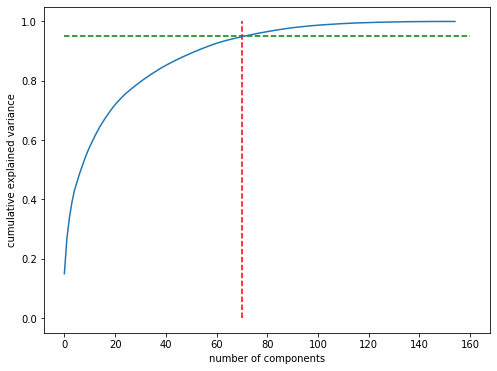

In [68]:
pca = PCA(random_state=42)
pca.fit(X_scaled_df)

fig = plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=160, xmin=0, colors="g", linestyles="--")
plt.show()

95% of the data available with 70 principal components

#### Train-Test split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, train_size=0.7, test_size=0.3, random_state=42)

#### Handling class imbalance problem

In [70]:
y_train.value_counts()

0.0    19728
1.0     1278
Name: target, dtype: int64

In [71]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [72]:
y_train_sm.value_counts()

0.0    19728
1.0    19728
Name: target, dtype: int64

#### Selecting 70 componenents and building model

In [73]:
pca_incr = IncrementalPCA(n_components=70)

In [74]:
churn_data_pca_train = pca_incr.fit_transform(X_train_sm)
churn_data_pca_train.shape

(39456, 70)

In [75]:
churn_data_pca_test = pca_incr.transform(X_test)
churn_data_pca_test.shape

(9003, 70)

In [76]:
corrmat = np.corrcoef(churn_data_pca_train.transpose())

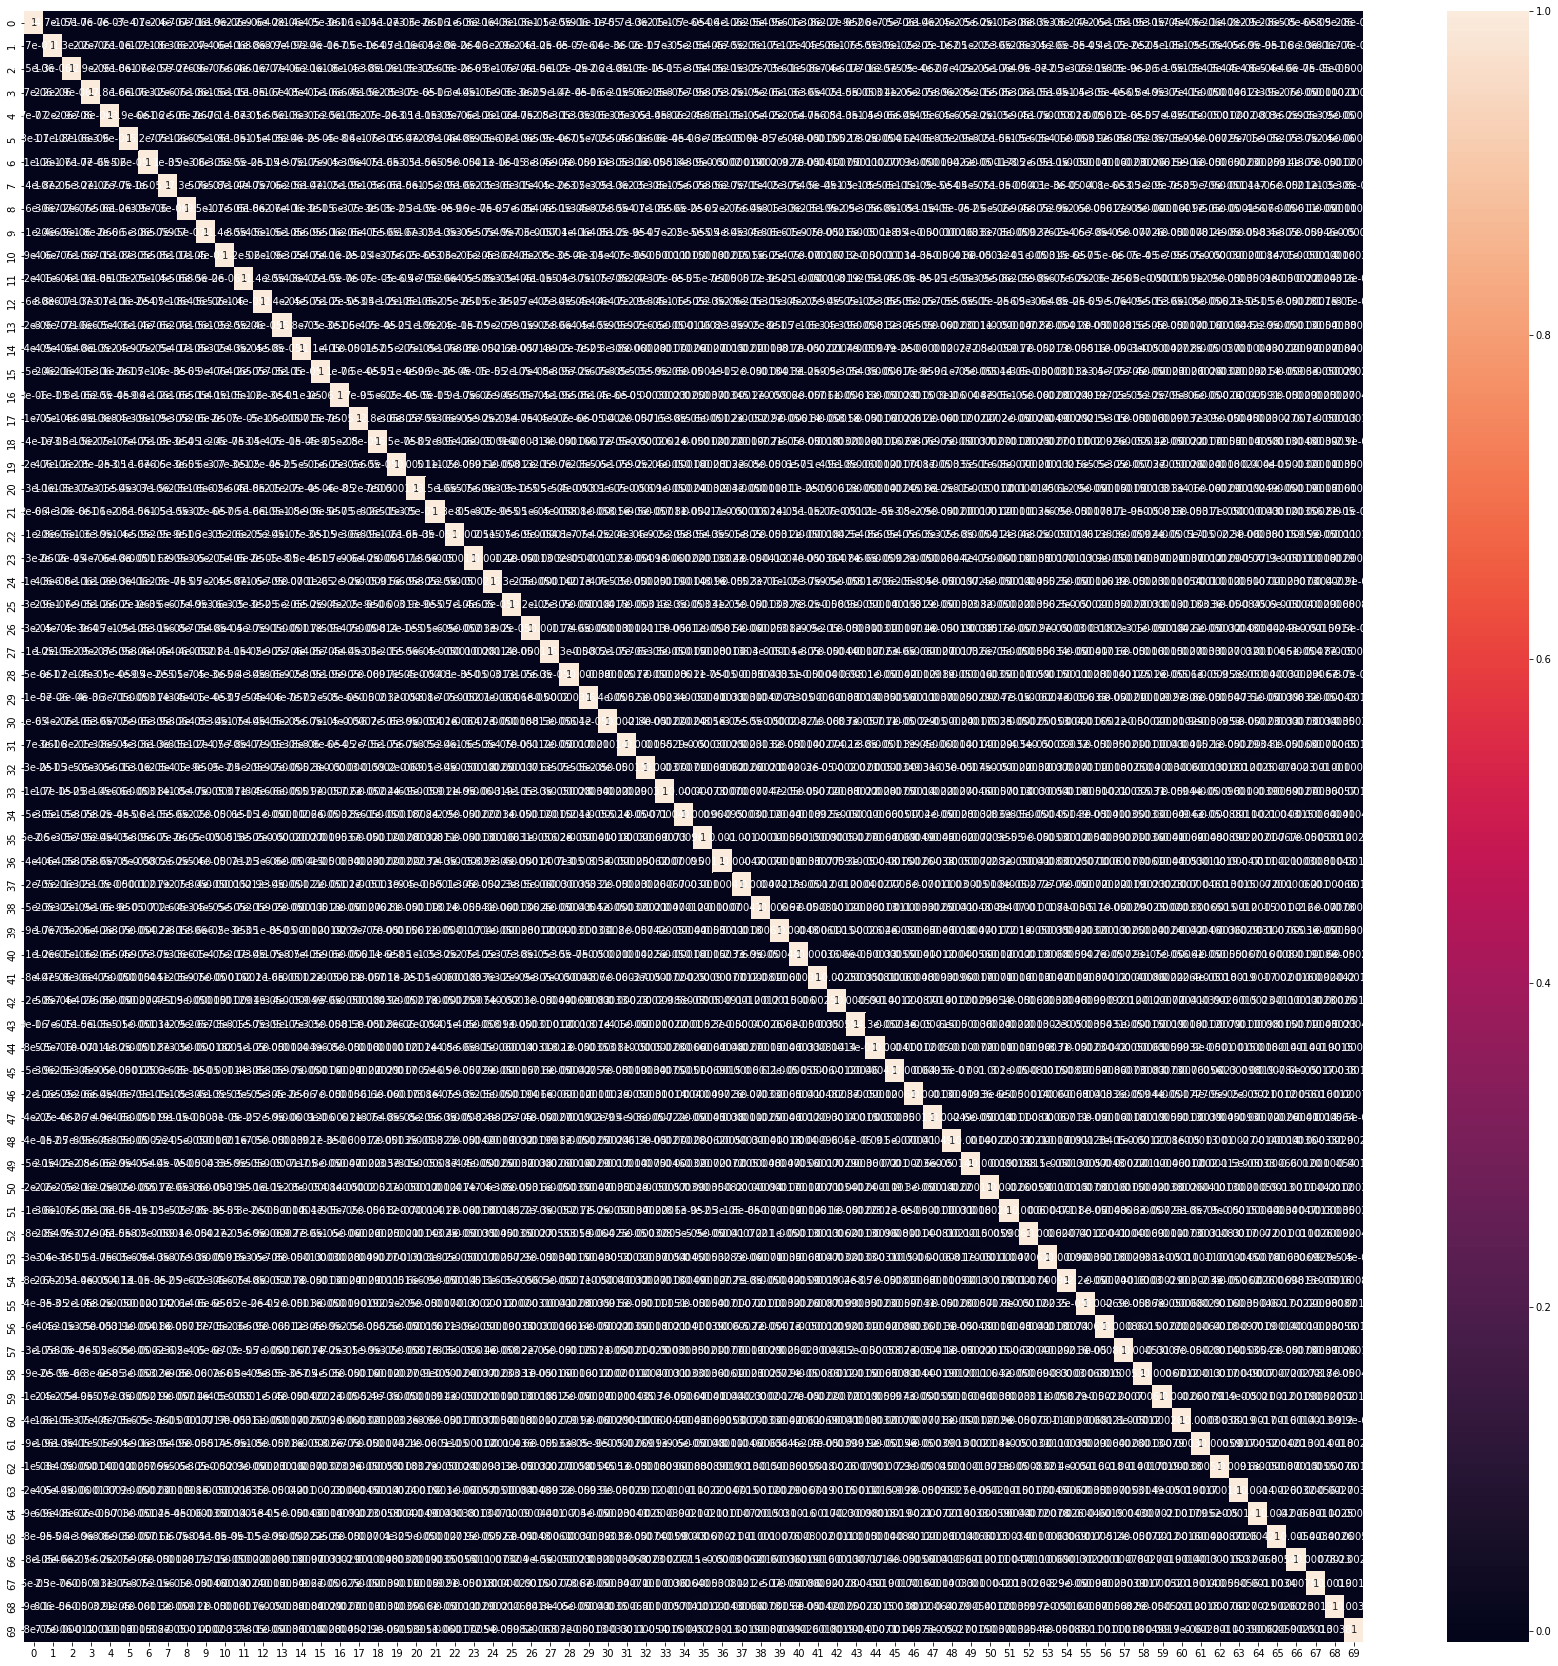

In [77]:
plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True)
plt.show()

From the color of the heat map it is evident that the data have no correlated at all

### Logistic Regression

In [78]:
lr = LogisticRegression()

In [79]:
model_lr = lr.fit(churn_data_pca_train, y_train_sm)

In [80]:
y_train.shape

(21006,)

In [81]:
churn_data_pca_train.shape

(39456, 70)

In [82]:
y_train.shape

(21006,)

In [83]:
y_test.shape

(9003,)

In [84]:
churn_data_pca_test.shape

(9003, 70)

In [85]:
y_pred_train = model_lr.predict(churn_data_pca_train)

In [86]:
y_pred_test = model_lr.predict(churn_data_pca_test)

In [87]:
from sklearn import metrics
metrics.roc_auc_score(y_train_sm, y_pred_train)

0.8632400648824007

In [88]:

metrics.roc_auc_score(y_test, y_pred_test)

0.8220792460832609

### Random Forest

In [89]:
### Random Forest

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve, confusion_matrix, accuracy_score

In [91]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [92]:
%%time
rf.fit(churn_data_pca_train, y_train_sm)

CPU times: user 978 ms, sys: 3.3 ms, total: 981 ms
Wall time: 980 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [93]:
rf.oob_score_

0.7438665855636658

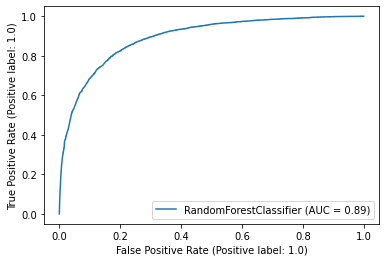

In [94]:
plot_roc_curve(rf,churn_data_pca_train, y_train_sm)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [95]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=10, min_samples_leaf=5, n_estimators=25)

In [96]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [97]:
'''grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")'''

'grid_search = GridSearchCV(estimator=rf,\n                           param_grid=params,\n                           cv = 4,\n                           n_jobs=-1, verbose=1, scoring="accuracy")'

In [98]:
rf.fit(churn_data_pca_train, y_train_sm)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

In [99]:
#grid_search.best_score_

In [100]:
#rf_best = grid_search.best_estimator_
#rf_best

In [101]:
#plot_roc_curve(rf_best, churn_data_pca_train, y_train_sm)
#lt.show()

In [102]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train_sm, dt_classifier.predict(churn_data_pca_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(churn_data_pca_test)))

In [103]:
evaluate_model(rf)

Train Accuracy : 0.9323296836982968
--------------------------------------------------
Test Accuracy : 0.8972564700655337


### Applying XGBoost on data without PCA 

In [104]:
#pip install xgboost

In [105]:
import xgboost as xgb

In [106]:
xgb_cf1 = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cf1.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [107]:
xgb_cf1.fit(X_train_sm, y_train_sm)
xgb_predictions = xgb_cf1.predict(X_test)

In [108]:
print("Train Accuracy :", accuracy_score(y_train_sm, xgb_cf1.predict(X_train_sm)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, xgb_cf1.predict(X_test)))

Train Accuracy : 0.9514395782643957
--------------------------------------------------
Test Accuracy : 0.9278018438298345


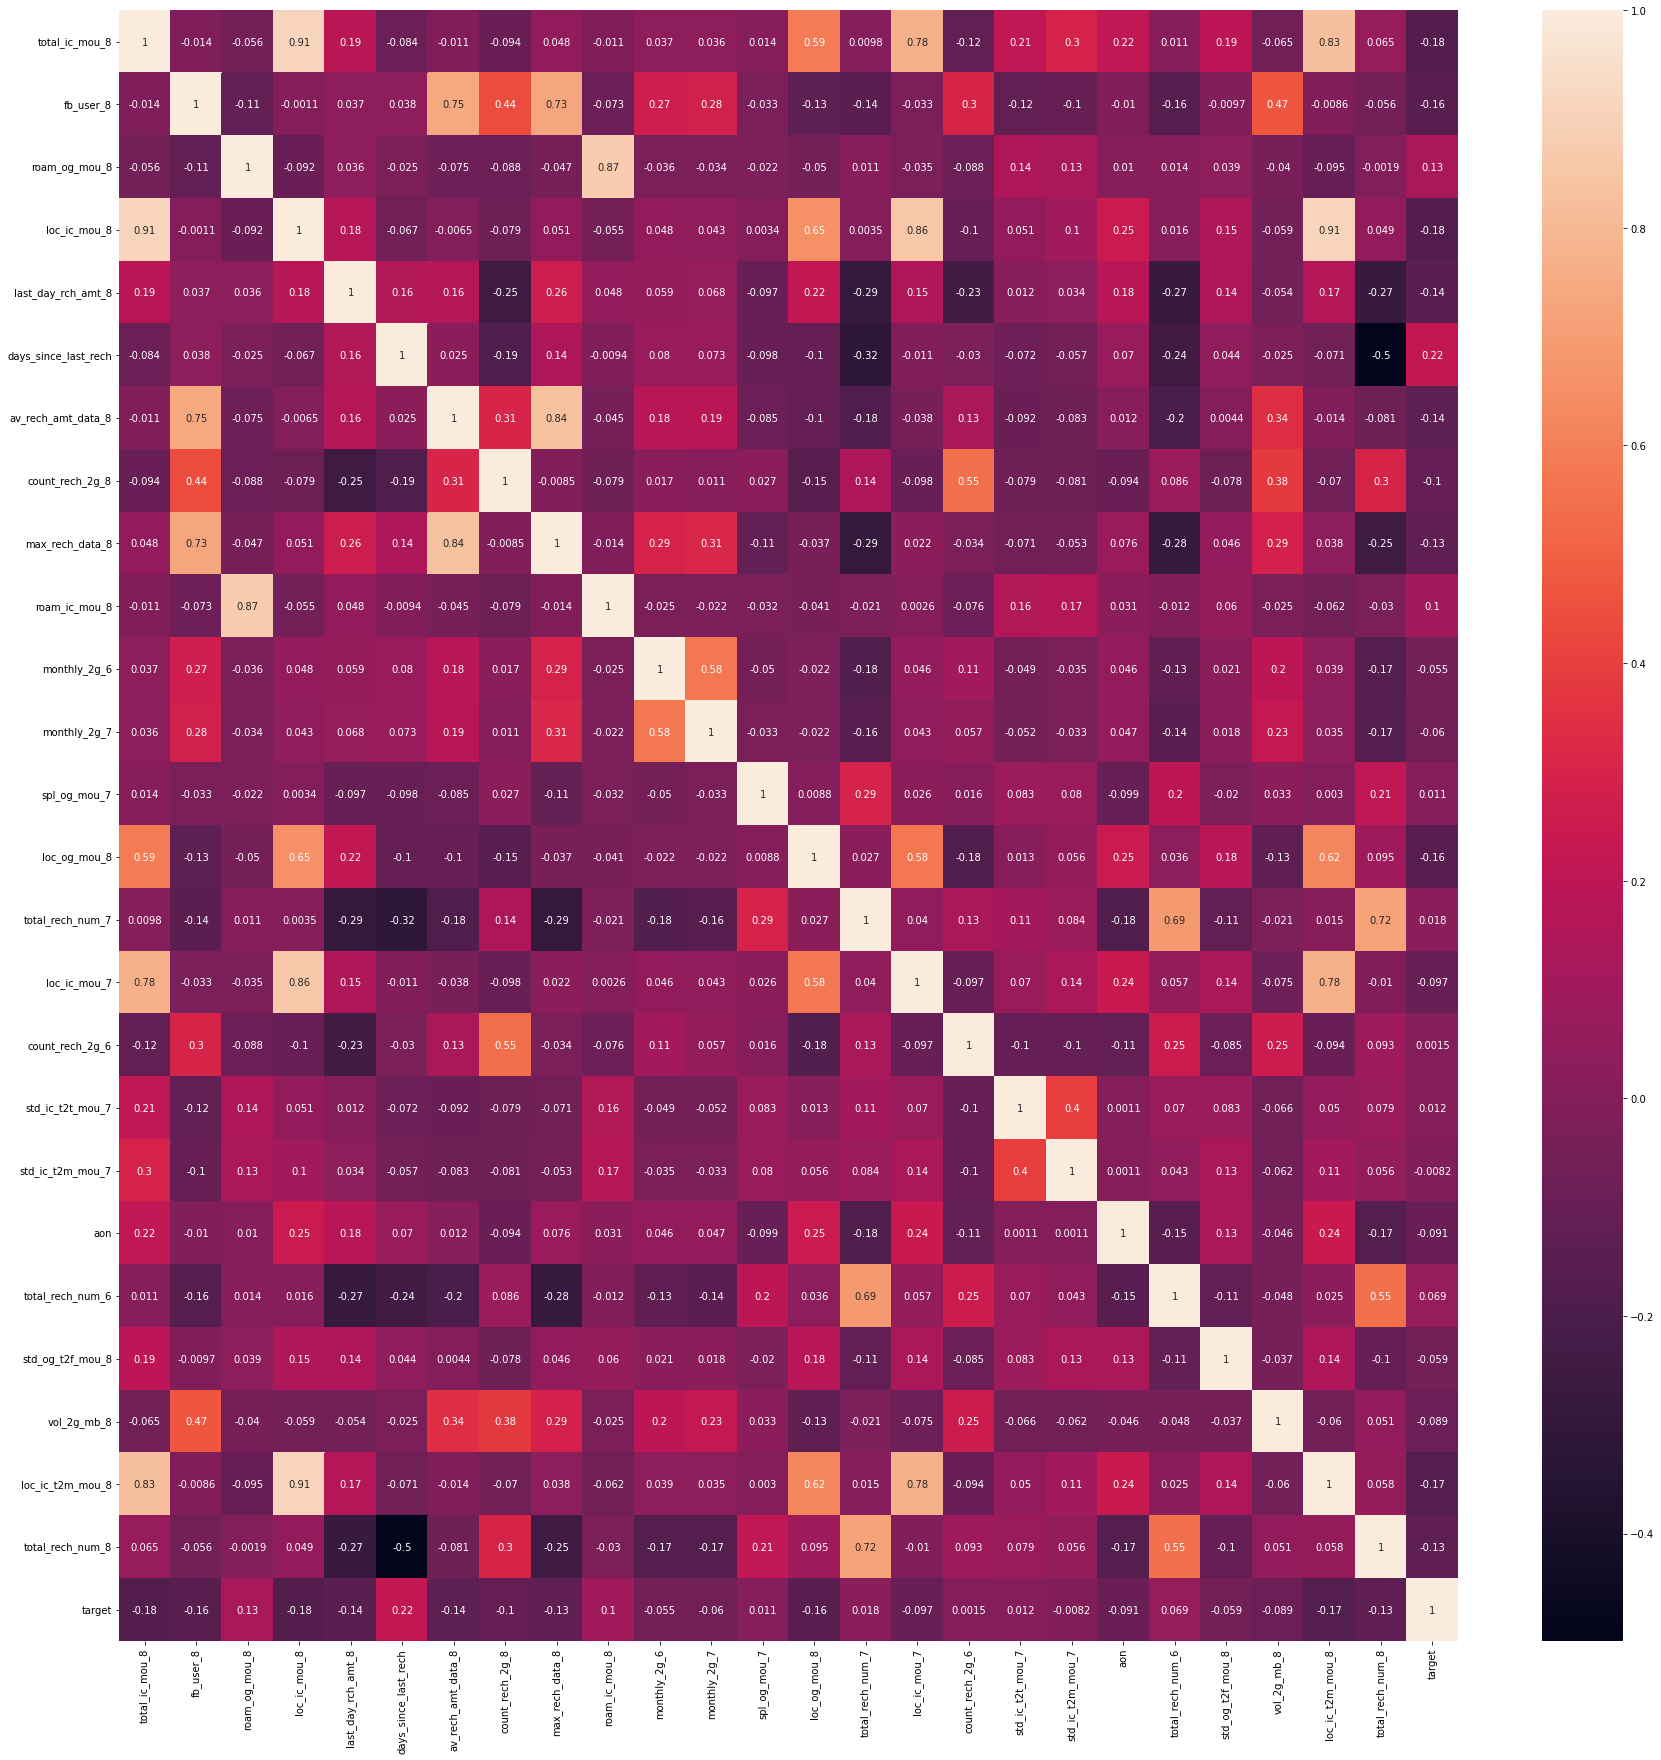

In [109]:
feature_imp_df = pd.DataFrame({"Feature":X_train_sm.columns, "Value":xgb_cf1.feature_importances_})
top_25_features = list(feature_imp_df.sort_values(by='Value', ascending=False).head(25)['Feature'])
top_25_features.append('target')
new_churn_data_HV['target'] = new_churn_data_HV['target'].astype('int64')

plt.figure(figsize=[30,30])
sns.heatmap(new_churn_data_HV[top_25_features].corr(), annot=True)
plt.show()

# Creating Neural Networks for Prediction

## Creating Neural Networks for Prediction Using Pytorch

In [110]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, classification_report


In [111]:
EPOCHS = 100
BATCH_SIZE = 512
LEARNING_RATE = 0.0005

In [112]:
#x_train_nn,x_valid,y_train_nn,y_valid=train_test_split(churn_data_pca_train,y_train_sm,test_size=0.2,random_state=36)

In [113]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
#train_data = TrainData(torch.FloatTensor(x_train_nn),torch.FloatTensor(y_train_nn)) 
    



## Valid data
class ValidData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
#Valid_data = ValidData(torch.FloatTensor(x_valid),torch.FloatTensor(y_valid.to_numpy()))


## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(churn_data_pca_test))

In [114]:
#train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
#Valid_loader = DataLoader(dataset=Valid_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [115]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 70.
        self.layer_1 = nn.Linear(70, 512) 
        self.layer_2 = nn.Linear(512, 512)
        self.layer_3 = nn.Linear(512, 512) 
        self.layer_4 = nn.Linear(512, 64)    
        self.layer_out = nn.Linear(64, 1) 
        
        self.Sigmoid = nn.Sigmoid()
        self.relu=nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(512)
        self.batchnorm3 = nn.BatchNorm1d(512)
        self.batchnorm4 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x) 
        x = self.relu(self.layer_4(x))
        x = self.batchnorm4(x)   
        x = self.dropout(x)
        x = self.Sigmoid(self.layer_out(x))
        #x=self.layer_out(x)
        return x

In [116]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [117]:
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

BinaryClassification(
  (layer_1): Linear(in_features=70, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=512, bias=True)
  (layer_3): Linear(in_features=512, out_features=512, bias=True)
  (layer_4): Linear(in_features=512, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [118]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [119]:
import matplotlib.pyplot as plt

val_losses = []
train_losses = []
acc_val = []
acc_train = []

In [120]:

model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    val_loss=0
    val_acc=0

    x_train_nn,x_valid,y_train_nn,y_valid=train_test_split(churn_data_pca_train,y_train_sm,test_size=0.2,random_state=np.random.randint(800))
    train_data = TrainData(torch.FloatTensor(x_train_nn),torch.FloatTensor(y_train_nn.to_numpy())) 
    Valid_data = ValidData(torch.FloatTensor(x_valid),torch.FloatTensor(y_valid.to_numpy()))
    train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
    Valid_loader = DataLoader(dataset=Valid_data, batch_size=BATCH_SIZE, shuffle=True)

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()

        
    train_losses.append(epoch_loss/len(train_loader))       
    acc_train.append(epoch_acc/len(train_loader)) 
    for X_batch, y_batch in Valid_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        val_loss += loss.item()
        val_acc += acc.item()
    val_losses.append(val_loss/len(Valid_loader))
    acc_val.append(val_acc/len(Valid_loader))
        
    print(f'Epoch {e+0:03}: | Train Loss: {epoch_loss/len(train_loader):.5f} | Train Acc: {epoch_acc/len(train_loader):.3f}| Valid Loss: {val_loss/len(Valid_loader):.5f} | Valid Acc: {val_acc/len(Valid_loader):.3f}')

Epoch 001: | Train Loss: 0.57163 | Train Acc: 50.048| Valid Loss: 0.54928 | Valid Acc: 49.938
Epoch 002: | Train Loss: 0.53671 | Train Acc: 50.065| Valid Loss: 0.53666 | Valid Acc: 49.750
Epoch 003: | Train Loss: 0.52852 | Train Acc: 50.016| Valid Loss: 0.52702 | Valid Acc: 50.125
Epoch 004: | Train Loss: 0.52368 | Train Acc: 50.016| Valid Loss: 0.52050 | Valid Acc: 49.688
Epoch 005: | Train Loss: 0.51944 | Train Acc: 50.145| Valid Loss: 0.51770 | Valid Acc: 49.688
Epoch 006: | Train Loss: 0.51798 | Train Acc: 49.758| Valid Loss: 0.51326 | Valid Acc: 50.750
Epoch 007: | Train Loss: 0.51558 | Train Acc: 49.855| Valid Loss: 0.51372 | Valid Acc: 50.562
Epoch 008: | Train Loss: 0.51437 | Train Acc: 50.000| Valid Loss: 0.51388 | Valid Acc: 50.062
Epoch 009: | Train Loss: 0.51247 | Train Acc: 50.097| Valid Loss: 0.51492 | Valid Acc: 49.875
Epoch 010: | Train Loss: 0.51228 | Train Acc: 49.935| Valid Loss: 0.51048 | Valid Acc: 50.375
Epoch 011: | Train Loss: 0.51269 | Train Acc: 49.871| Valid 

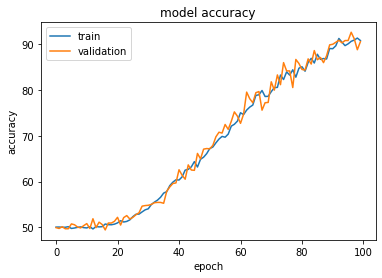

In [121]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(acc_train)
plt.plot(acc_val)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

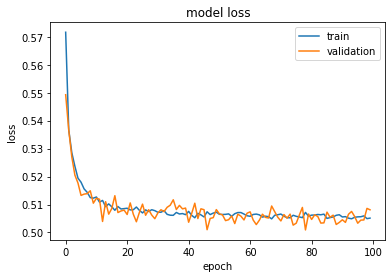

In [122]:
plt.subplots()
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [123]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [124]:
confusion_matrix(y_test, y_pred_list)

array([[6458, 2053],
       [ 160,  332]])

In [125]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

         0.0       0.98      0.76      0.85      8511
         1.0       0.14      0.67      0.23       492

    accuracy                           0.75      9003
   macro avg       0.56      0.72      0.54      9003
weighted avg       0.93      0.75      0.82      9003



## Creating Neural Networks for Prediction Using Tensorflow and keras

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import tensorflow as tf

In [127]:
class myCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}): # this method will be called everytime at the end of each epoch
        if(logs.get('accuracy')>0.97):
            print("\nReached 97% accuracy so cancelling training!")
            self.model.stop_training = True
            
callback = myCallback()

In [128]:
churn_data_pca_train.shape, churn_data_pca_test.shape, y_train_sm.shape, y_test.shape

((39456, 70), (9003, 70), (39456,), (9003,))

In [129]:
type(churn_data_pca_train)

numpy.ndarray

In [130]:
n_features = churn_data_pca_train.shape[1]

In [131]:

my_classifier = Sequential()

# Adding the input layer AND the first hidden layer (Pay attention to this)
my_classifier.add(Dense(units = 70, kernel_initializer = 'uniform',
                        activation = 'relu', input_dim = n_features))

# Adding the second hidden layer
my_classifier.add(Dense(units = 8, kernel_initializer = 'uniform',
                        activation = 'relu'))

# Adding the last (output) layer
my_classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                        activation = 'sigmoid'))

In [132]:
my_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

In [133]:
history = my_classifier.fit(churn_data_pca_train, y_train_sm, validation_split=0.2, batch_size = 10, epochs = 50)

Epoch 1/50
3157/3157 [==============================] - 8s 2ms/step - loss: 0.2863 - accuracy: 0.8840 - val_loss: 0.2934 - val_accuracy: 0.8798
Epoch 2/50
3157/3157 [==============================] - 7s 2ms/step - loss: 0.1959 - accuracy: 0.9259 - val_loss: 0.2053 - val_accuracy: 0.9293
Epoch 3/50
3157/3157 [==============================] - 7s 2ms/step - loss: 0.1529 - accuracy: 0.9436 - val_loss: 0.1773 - val_accuracy: 0.9373
Epoch 4/50
3157/3157 [==============================] - 6s 2ms/step - loss: 0.1269 - accuracy: 0.9544 - val_loss: 0.1436 - val_accuracy: 0.9559
Epoch 5/50
3157/3157 [==============================] - 7s 2ms/step - loss: 0.1083 - accuracy: 0.9619 - val_loss: 0.0933 - val_accuracy: 0.9766
Epoch 6/50
3157/3157 [==============================] - 7s 2ms/step - loss: 0.0976 - accuracy: 0.9654 - val_loss: 0.0572 - val_accuracy: 0.9843
Epoch 7/50
3157/3157 [==============================] - 7s 2ms/step - loss: 0.0877 - accuracy: 0.9686 - val_loss: 0.0671 - val_accuracy:

Predicting train set results

In [134]:
# Make predictions
# Predicting the Train set results
y_pred_train = my_classifier.predict(churn_data_pca_train)
y_pred_train = (y_pred_train > 0.5)

Predicting test set results

In [135]:
# Predicting the Test set results
y_pred_test = my_classifier.predict(churn_data_pca_test)
y_pred_test = (y_pred_test > 0.5)

In [136]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[8233,  278],
       [ 287,  205]])

In [137]:
# list all the data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


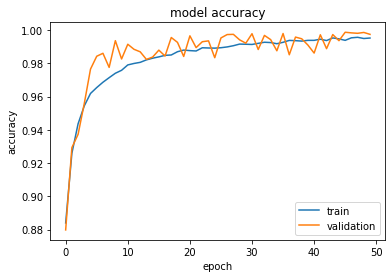

In [138]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

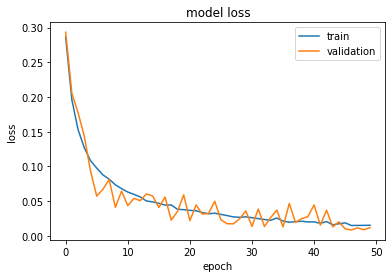

In [139]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

**Now testing Neural Network using keras and tensorflow**

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import tensorflow as tf

In [141]:
class myCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}): # this method will be called everytime at the end of each epoch
        if(logs.get('accuracy')>0.97):
            print("\nReached 97% accuracy so cancelling training!")
            self.model.stop_training = True
            
callback = myCallback()

In [142]:
churn_data_pca_train.shape, churn_data_pca_test.shape, y_train_sm.shape, y_test.shape

((39456, 70), (9003, 70), (39456,), (9003,))

In [143]:
type(churn_data_pca_train)

numpy.ndarray

In [144]:
n_features = churn_data_pca_train.shape[1]

In [145]:

my_classifier = Sequential()

# Adding the input layer AND the first hidden layer (Pay attention to this)
my_classifier.add(Dense(units = 70, kernel_initializer = 'uniform',
                        activation = 'relu', input_dim = n_features))

# Adding the second hidden layer
my_classifier.add(Dense(units = 8, kernel_initializer = 'uniform',
                        activation = 'relu'))

# Adding the last (output) layer
my_classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                        activation = 'sigmoid'))

In [146]:
opt = tf.keras.optimizers.Adam(learning_rate=3e-4)

In [147]:
my_classifier.compile(optimizer = opt, loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

In [148]:
history = my_classifier.fit(churn_data_pca_train, y_train_sm, validation_split=0.2, batch_size = 64, epochs = 50)

Epoch 1/50
494/494 [==============================] - 2s 3ms/step - loss: 0.4685 - accuracy: 0.8095 - val_loss: 0.4237 - val_accuracy: 0.8192
Epoch 2/50
494/494 [==============================] - 1s 2ms/step - loss: 0.2967 - accuracy: 0.8802 - val_loss: 0.3824 - val_accuracy: 0.8400
Epoch 3/50
494/494 [==============================] - 1s 2ms/step - loss: 0.2783 - accuracy: 0.8886 - val_loss: 0.3623 - val_accuracy: 0.8511
Epoch 4/50
494/494 [==============================] - 1s 3ms/step - loss: 0.2626 - accuracy: 0.8959 - val_loss: 0.3542 - val_accuracy: 0.8606
Epoch 5/50
494/494 [==============================] - 1s 2ms/step - loss: 0.2467 - accuracy: 0.9045 - val_loss: 0.3370 - val_accuracy: 0.8720
Epoch 6/50
494/494 [==============================] - 1s 2ms/step - loss: 0.2307 - accuracy: 0.9131 - val_loss: 0.3021 - val_accuracy: 0.8867
Epoch 7/50
494/494 [==============================] - 1s 3ms/step - loss: 0.2150 - accuracy: 0.9186 - val_loss: 0.2709 - val_accuracy: 0.9032
Epoch 

We can see that the loss has reduced from 0.4 to 0.02 and the accuracy has attained the max limit of 99.28

Predicting train set results

In [149]:
# Make predictions
# Predicting the Train set results
y_pred_train = my_classifier.predict(churn_data_pca_train)
y_pred_train = (y_pred_train > 0.5)

Predicting test set results

In [150]:
# Predicting the Test set results
y_pred_test = my_classifier.predict(churn_data_pca_test)
y_pred_test = (y_pred_test > 0.5)

In [151]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
acc = accuracy_score(y_test, y_pred_test)
cm, acc

(array([[8163,  348],
        [ 246,  246]]), 0.9340219926691103)

In [152]:
# list all the data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


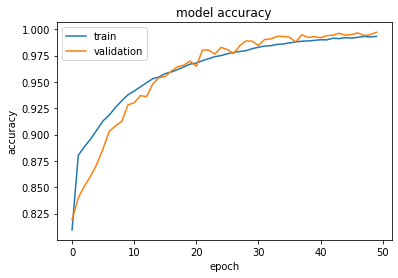

In [153]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

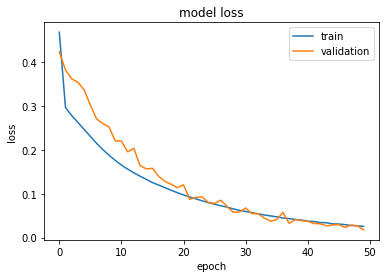

In [154]:
23# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()